
## Project:Medical Representative

Medical representatives are the key point of contact between
pharmaceutical and medical companies and healthcare professionals.
A medical representative's job is to promote and sell their company's
products, whether that's pharmaceutical drugs or medical equipment.
Customers can include doctors, nurses and pharmacists. The medical
representative will increase product awareness, answer queries,
company.

The job of medical representative has a lot of challenges but the most
important one is how the medical representative convinces a doctor to write a
drug from the medical company which he works for in his prescription where
there are many competitors' drugs that have the same active ingredient from
other companies.
The goal is to know if a doctor with some
specific features will write or not one of 6 drugs for a medical
company that has license to produce several types of local produced
drugs with the same active ingredients of multinational original drugs.

## Exploring the Data
In this part i'm going to explore the data and all the features.

### Datasets and Inputs
The dataset was collected by me in a year from private clinics,
hospitals and pharmacies
All data are public data that was collected from doctors and
pharmacists about 6 drugs produced by a certain medical company.


In [1]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sb

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Pretty display for notebooks
%matplotlib inline
%load_ext sql
import sqlite3

con = sqlite3.connect("med.db")
cur = con.cursor()
%sql sqlite:///med.db



'Connected: @med.db'

## Featureset Exploration
### Input Data fields (Features and Labels)
The input data consists of 390 samples collected from 253 doctors.
This data will be used for training and validation test in a data base file
named **med** attached with the project proposal.
the data in database called **med** and splited in two tables connected by the id column.
#### table 1 : medicine_table
* **id_m:** row id for every medicine and it is compatable with id_dr column in doctor_table
* **medicine:** The commercial name of the medicine that I refer to it as type1 to type6.
* **Price:** price for every drug of these 6 drugs for patient.

#### table 2 : doctor_table
* **id_dr:** row id for every doctor and it is compatable with id_m column in medicine_table
* **exam_price:** examination price that the doctor takes from the patient.
* **clinic_hos:** classification if this doctor has a private 'clinic' or works in a 'hospital'.
* **dr_class:** doctor class was classified according to number of patients for every doctor and how much is this doctor famous and it was classified to 'a' and 'b'.

**where:**

* **class a:** are doctors with high patient rate
* **class b:** are doctors with medium patient rate
* **area:** every medical representative cover some areas in a city where the medical representative has to make a lot of visits for alot of doctors in different places and I refer to each area with the name (area1 to area8)with total 8 areas that I have covered to make my prospection.
* **specialty:** the specialty of the doctor is one of the most important features because it will determine which of the 6 drugs will be suitable for this doctor to write it in his prescription. 

**These specialties are:**
* **Chest:** chest specialist
* **Im:** internal medicine specialist
* **Cd:** cardiology specialist
* **Neuro:** neurology specialist
* **Git:** gastrointestinal tract specialist
* **Ent:** ear, nose and throat specialist
* **Sur:** surgery specialist
* **Uro:** urology specialist
* **Gp:** general practitioner
* **Or:** orthopedic specialist
* **Vas:** vascular specialst

**With total 11 specialties.**

* **Target (label):** just one target to classify if this doctor write any of these drugs in prescription to his patients or not. With (1) if the doctor writes the drug in his prescription and (0)if not.

In [2]:
%sql SELECT * FROM medicine_table LIMIT(10) ;

 * sqlite:///med.db
Done.


id_m,medicine,price
1,type1,45
2,type4,36
3,type1,45
4,type1,45
5,type5,29
6,type5,29
7,type6,20
8,type4,36
9,type2,30
10,type2,30


In [3]:
%sql SELECT * FROM doctor_table LIMIT(10) ;

 * sqlite:///med.db
Done.


id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
1,area1,chest,a,200,clinic,1
2,area2,im,b,100,clinic,1
3,area8,chest,a,75,hospital,1
4,area5,chest,a,30,hospital,1
5,area6,uro,a,220,clinic,0
6,area8,im,b,140,clinic,1
7,area2,im,b,70,hospital,1
8,area8,chest,a,75,hospital,0
9,area3,cd,b,150,clinic,1
10,area1,neuro,b,150,clinic,1


### First We Write and Execute the SQL Query using the %sql magic command

In [4]:
data_top10 = """
SELECT * 
FROM doctor_table d 
LEFT JOIN medicine_table m ON m.id_m = d.id_dr
LIMIT(10);
"""

# Use the %sql magic command to execute the query and get the result
data_top10 = %sql $data_top10
data_top10

 * sqlite:///med.db
Done.


id_dr,area,speciality,dr_class,exam_price,clinic_hos,write,id_m,medicine,price
1,area1,chest,a,200,clinic,1,1,type1,45
2,area2,im,b,100,clinic,1,2,type4,36
3,area8,chest,a,75,hospital,1,3,type1,45
4,area5,chest,a,30,hospital,1,4,type1,45
5,area6,uro,a,220,clinic,0,5,type5,29
6,area8,im,b,140,clinic,1,6,type5,29
7,area2,im,b,70,hospital,1,7,type6,20
8,area8,chest,a,75,hospital,0,8,type4,36
9,area3,cd,b,150,clinic,1,9,type2,30
10,area1,neuro,b,150,clinic,1,10,type2,30


# Convert the Result to a Pandas DataFrame
### Transform the result into a DataFrame:
#### Display the data

In [5]:
query = """
SELECT * 
FROM doctor_table d 
LEFT JOIN medicine_table m ON m.id_m = d.id_dr;
"""

# Use the %sql magic command to execute the query and get the result
result = %sql $query

# Convert the result to a DataFrame
data = pd.DataFrame(result,columns=['id_dr','area','speciality','dr_class','exam_price','clinic_hos','write','id_m','medicine','price'])

#drop the id_m column as it's the same column with id_dr
data.drop('id_m',axis=1,inplace=True)

# Display the DataFrame
display(data)

 * sqlite:///med.db
Done.


,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write,medicine,price
0,1,area1,chest,a,200,clinic,1,type1,45
1,2,area2,im,b,100,clinic,1,type4,36
2,3,area8,chest,a,75,hospital,1,type1,45
3,4,area5,chest,a,30,hospital,1,type1,45
4,5,area6,uro,a,220,clinic,0,type5,29
...,...,...,...,...,...,...,...,...,...
385,386,area8,sur,b,75,hospital,0,type5,29
386,387,area2,im,b,70,hospital,0,type2,30
387,388,area7,im,a,120,clinic,1,type1,45
388,389,area8,sur,b,75,hospital,1,type1,45


#### Let's Explore our data for cleaning and find out if there is duplicated data or NULLs

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_dr       390 non-null    int64 
 1   area        390 non-null    object
 2   speciality  390 non-null    object
 3   dr_class    390 non-null    object
 4   exam_price  390 non-null    int64 
 5   clinic_hos  390 non-null    object
 6   write       390 non-null    int64 
 7   medicine    390 non-null    object
 8   price       390 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 27.5+ KB


In [7]:
data.duplicated('id_dr').sum()

0

##### We Coclude that there is no NULL data and no duplication

## Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of doctors who wrote any of the 6 drugs in their prescription. In the code cell below, i will compute the following:

The total number of records, 'n_records'

The number of doctors who wrote any of the 6 drugs in their prescription, 'n_doctor_who_write'.

The number of doctors who didn't write any of the 6 drugs in their prescription, 'n_doctor_who_not_write'.

The percentage of doctors who wrote any of the 6 drugs in their prescription , 'write_percent'.

In [8]:
total_records = data.shape[0]

n_doctor_who_not_write = data[data['write'] == 0].value_counts().sum()

write_percent = round(data[data['write'] == 1].value_counts().sum() / total_records *100,2)

print(f'The number of doctors who wrote any of the 6 drugs in their prescription:  {total_records} \n')
print(f'The number of doctors who didn\'t write any of the 6 drugs in their prescription: {n_doctor_who_not_write} \n')
print(f'The percentage of doctors who wrote any of the 6 drugs in their prescription {write_percent}')

The number of doctors who wrote any of the 6 drugs in their prescription:  390 

The number of doctors who didn't write any of the 6 drugs in their prescription: 161 

The percentage of doctors who wrote any of the 6 drugs in their prescription 58.72


# Skweed Data

In [9]:
numeric_data = data.select_dtypes(include = ["int64" , "float64"])
numeric_data

,id_dr,exam_price,write,price
0,1,200,1,45
1,2,100,1,36
2,3,75,1,45
3,4,30,1,45
4,5,220,0,29
...,...,...,...,...
385,386,75,0,29
386,387,70,0,30
387,388,120,1,45
388,389,75,1,45


In [10]:
skew = []
for i in range(len(numeric_data.columns)):
    skew.append(numeric_data.columns[i])
skew

['id_dr', 'exam_price', 'write', 'price']

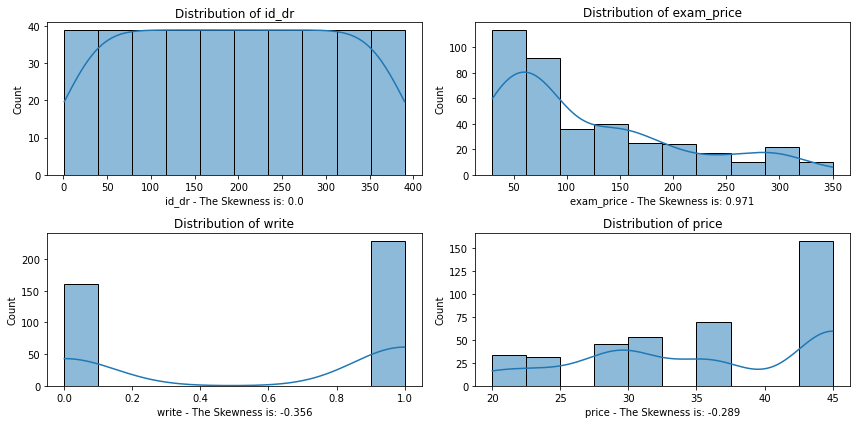

In [11]:
# Create a figure and a grid of subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 6))  # Create a 2x3 grid of axes

# Loop through the number of plots you have
for i in range(len(skew)):
    ax = axs[i // 2, i % 2]  # Get the corresponding axis
    sb.histplot(data[skew[i]], kde=True, ax=ax)  # Specify the axis
    skewness = data[skew[i]].skew()
    ax.set_xlabel(f"{skew[i]} - The Skewness is: {round(skewness, 3)}")
    ax.set_title(f"Distribution of {skew[i]}")

# Adjust layout
plt.tight_layout()
plt.show()

# Analysis of Skewness in Data

In our analysis, we have evaluated the skewness of the dataset. Skewness is a measure of the asymmetry of the distribution of values in a dataset. 

## Key Findings

- **No Skewness Detected:** 
  - The skewness values for all relevant variables in our dataset are close to zero, indicating that the distributions are approximately symmetric. 
  - A skewness value between -0.5 and 0.5 typically suggests that the data is fairly symmetrical.

## Conclusion

Since there is no significant skewness in the data, we can proceed with analyses that assume normality without concern for the biases introduced by skewed distributions.

#### Let's make our analysis to go indeep into our data

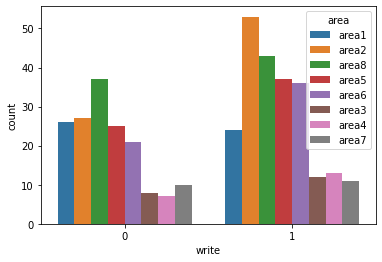

In [12]:
#find a relationship between feature "area" and if the doctor write
sb.countplot(data=data,x='write',hue="area");

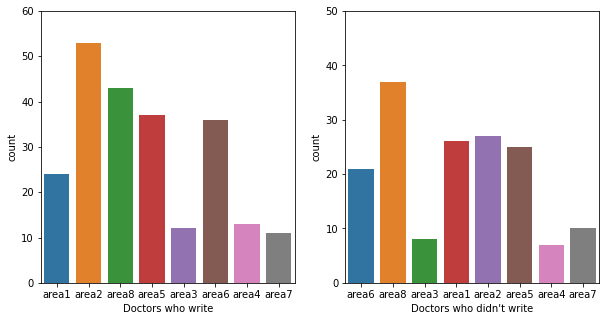

In [13]:
plt.figure(figsize = [10, 5])
# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sb.countplot(data=data[data["write"] == 1],x='area')
ylabel1=np.arange(0,70,10)
plt.yticks(ylabel1);
plt.xlabel("Doctors who write");
plt.subplot(1, 2, 2)
sb.countplot(data=data[data["write"] == 0],x='area')
ylabel0=np.arange(0,60,10)
plt.yticks(ylabel0);
plt.xlabel("Doctors who didn't write");

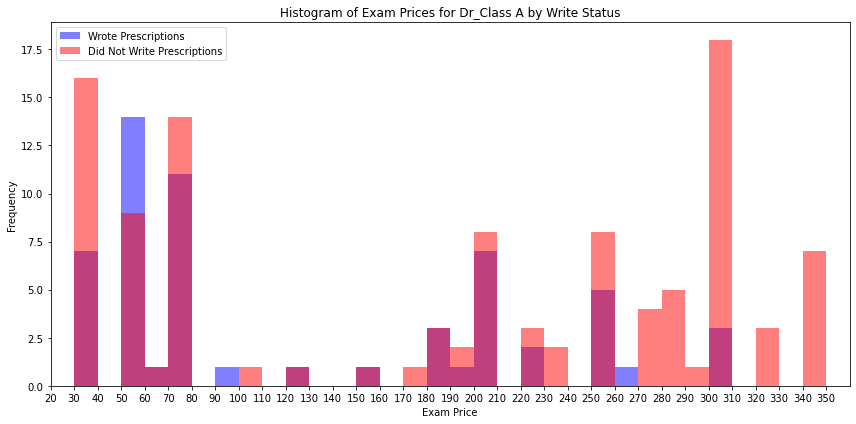

In [14]:
# Filter data for doctors of class "b"
doc_write=data[(data["dr_class"] == "a") & (data["write"] == 1)] # blue
doc_not_write=data[(data["dr_class"] == "a") & (data["write"] == 0)]  # red

# Define the bins for the histogram
bins=np.arange(0,data['exam_price'].max()+10,10)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(data=doc_write,x='exam_price',bins=bins,color="blue", alpha=0.5, label='Wrote Prescriptions')
plt.hist(data=doc_not_write,x='exam_price',bins=bins,color="red", alpha=0.5, label='Did Not Write Prescriptions')

# Set the x-axis limits
plt.xlim(20, data['exam_price'].max() + 10)

# Set x-ticks with custom increments
increment = 10  # Define your desired increment
x_ticks = np.arange(20, data['exam_price'].max() + 10, increment)
plt.xticks(x_ticks)

# Set labels and title
plt.xlabel("Exam Price")
plt.ylabel("Frequency")
plt.title("Histogram of Exam Prices for Dr_Class A by Write Status")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

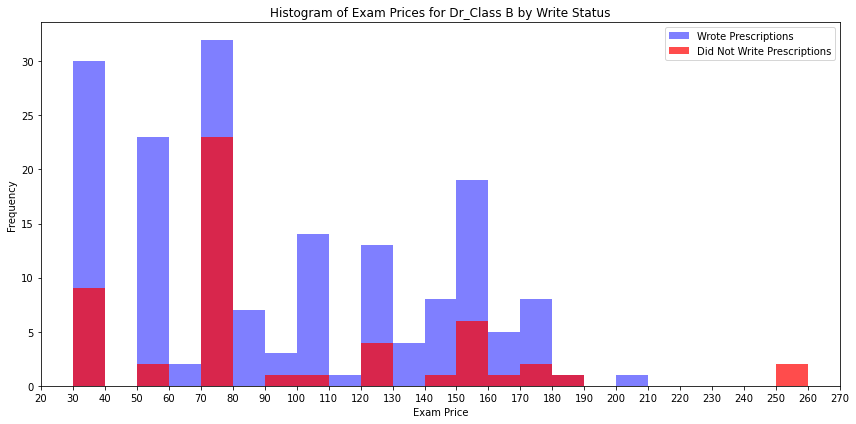

In [15]:
# Filter data for doctors of class "b"
doc_write = data[(data["dr_class"] == "b") & (data["write"] == 1)]  # Blue
doc_not_write = data[(data["dr_class"] == "b") & (data["write"] == 0)]  # Red

# Define the bins for the histogram
bins = np.arange(0, data['exam_price'].max() + 10, 10)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(doc_write['exam_price'], bins=bins, color="blue", alpha=0.5, label='Wrote Prescriptions')
plt.hist(doc_not_write['exam_price'], bins=bins, color="red", alpha=0.7, label='Did Not Write Prescriptions')

# Set the x-axis limits
plt.xlim(20, data['exam_price'].max() - 80)

# Set x-ticks with custom increments
increment = 10  # Define your desired increment
x_ticks = np.arange(20, data['exam_price'].max()-80 + 10, increment)
plt.xticks(x_ticks)

# Set labels and title
plt.xlabel("Exam Price")
plt.ylabel("Frequency")
plt.title("Histogram of Exam Prices for Dr_Class B by Write Status")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

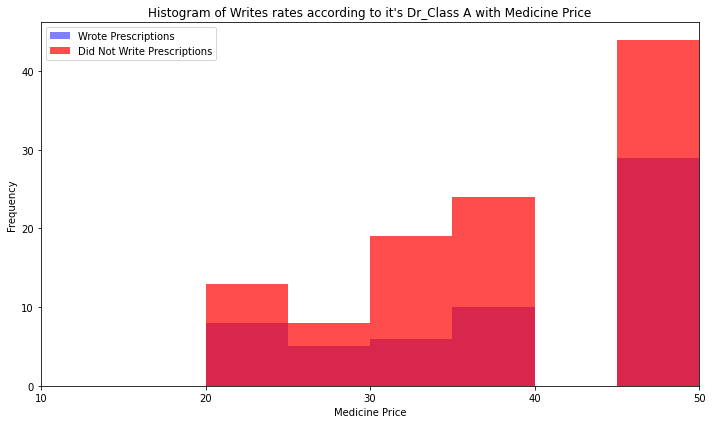

In [16]:
# Filter data for doctors of class "b"
doc_write=data[(data["dr_class"] == "a") & (data["write"] == 1)] # blue
doc_not_write=data[(data["dr_class"] == "a") & (data["write"] == 0)]  # red

# Define the bins for the histogram
bins=np.arange(0,data['price'].max()+10,5)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(data=doc_write,x='price',bins=bins,color="blue", alpha=0.5, label='Wrote Prescriptions')
plt.hist(data=doc_not_write,x='price',bins=bins,color="red", alpha=0.7, label='Did Not Write Prescriptions')

# Set the x-axis limits
plt.xlim(20, data['price'].max())

# Set x-ticks with custom increments
increment = 10  # Define your desired increment
x_ticks = np.arange(10, data['price'].max() + 10, increment)
plt.xticks(x_ticks)

# Set labels and title
plt.xlabel("Medicine Price")
plt.ylabel("Frequency")
plt.title("Histogram of Writes rates according to it's Dr_Class A with Medicine Price")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

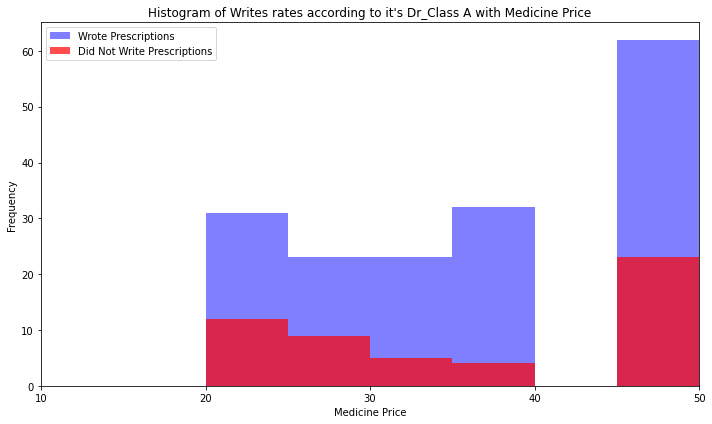

In [17]:
# Filter data for doctors of class "b"
doc_write=data[(data["dr_class"] == "b") & (data["write"] == 1)] # blue
doc_not_write=data[(data["dr_class"] == "b") & (data["write"] == 0)]  # red

# Define the bins for the histogram
bins=np.arange(0,data['price'].max()+10,5)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(data=doc_write,x='price',bins=bins,color="blue", alpha=0.5, label='Wrote Prescriptions')
plt.hist(data=doc_not_write,x='price',bins=bins,color="red", alpha=0.7, label='Did Not Write Prescriptions')

# Set the x-axis limits
plt.xlim(20, data['price'].max())

# Set x-ticks with custom increments
increment = 10  # Define your desired increment
x_ticks = np.arange(10, data['price'].max() + 10, increment)
plt.xticks(x_ticks)

# Set labels and title
plt.xlabel("Medicine Price")
plt.ylabel("Frequency")
plt.title("Histogram of Writes rates according to it's Dr_Class A with Medicine Price")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

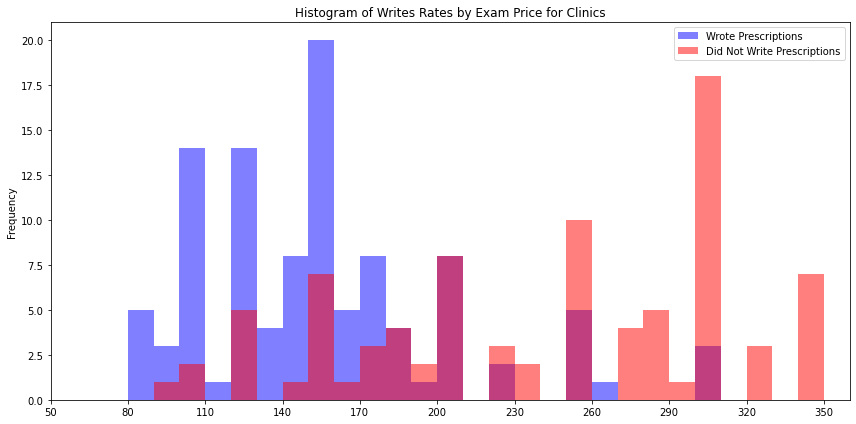

In [18]:
# Filter data for doctors of class "b"
doc_write=data[(data["clinic_hos"] == "clinic") & (data["write"] == 1)] # blue
doc_not_write=data[(data["clinic_hos"] == "clinic") & (data["write"] == 0)]  # red

# Define the bins for the histogram
bins=np.arange(0,data['exam_price'].max()+10,10)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(data=doc_write,x='exam_price',bins=bins,color="blue", alpha=0.5, label='Wrote Prescriptions')
plt.hist(data=doc_not_write,x='exam_price',bins=bins,color="red", alpha=0.5, label='Did Not Write Prescriptions')

# Set the x-axis limits
plt.xlim(60, data['exam_price'].max() + 10)

# Set x-ticks with custom increments
increment = 30  # Define your desired increment
x_ticks = np.arange(50, data['exam_price'].max() + 10, increment)
plt.xticks(x_ticks)

# Set labels and title
plt.ylabel("Frequency")
plt.title("Histogram of Writes Rates by Exam Price for Clinics")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


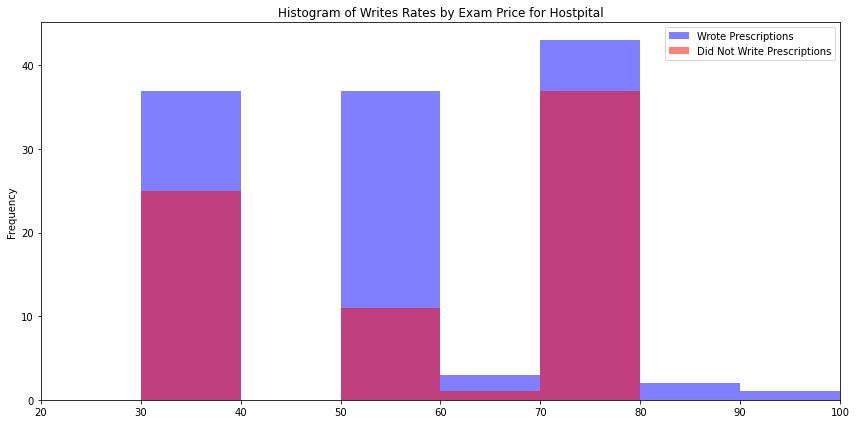

In [19]:
# Filter data for doctors of class "b"
doc_write=data[(data["clinic_hos"] == "hospital") & (data["write"] == 1)] # blue
doc_not_write=data[(data["clinic_hos"] == "hospital") & (data["write"] == 0)]  # red

# Define the bins for the histogram
bins=np.arange(0,data['exam_price'].max()+10,10)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(data=doc_write,x='exam_price',bins=bins,color="blue", alpha=0.5, label='Wrote Prescriptions')
plt.hist(data=doc_not_write,x='exam_price',bins=bins,color="red", alpha=0.5, label='Did Not Write Prescriptions')

# Set the x-axis limits
plt.xlim(20, 100)

# Set x-ticks with custom increments
increment = 10  # Define your desired increment
x_ticks = np.arange(20, 110, increment)
plt.xticks(x_ticks)

# Set labels and title
plt.ylabel("Frequency")
plt.title("Histogram of Writes Rates by Exam Price for Hostpital")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


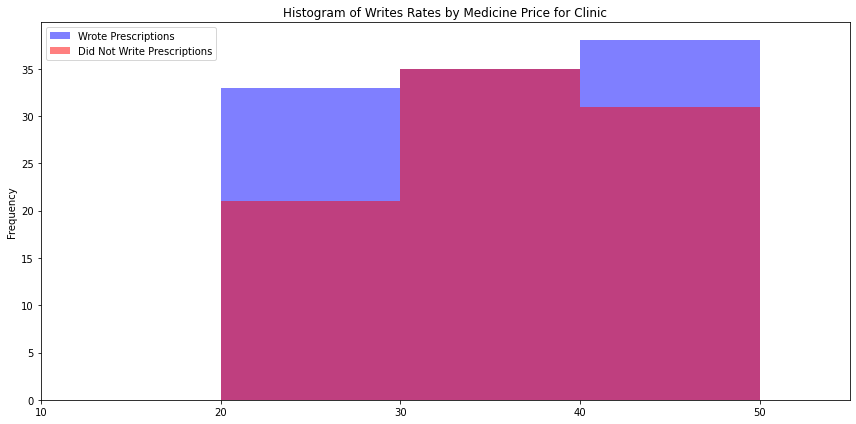

In [20]:
# Filter data for doctors of class "clinic"
doc_write = data[(data["clinic_hos"] == "clinic") & (data["write"] == 1)]  # Blue
doc_not_write = data[(data["clinic_hos"] == "clinic") & (data["write"] == 0)]  # Red

# Define the bins for the histogram
bins = np.arange(0, data['price'].max() + 10, 10)  # Adjusted bin range

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(data=doc_write, x='price', bins=bins, color="blue", alpha=0.5, label='Wrote Prescriptions')
plt.hist(data=doc_not_write, x='price', bins=bins, color="red", alpha=0.5, label='Did Not Write Prescriptions')

# Set the x-axis limits
plt.xlim(10, data['price'].max() + 10)  # Set limits to be consistent with the first chart

# Set x-ticks with custom increments
increment = 10  # Define your desired increment
x_ticks = np.arange(10, data['price'].max() + 10, increment)
plt.xticks(x_ticks)

# Set labels and title
plt.ylabel("Frequency")
plt.title("Histogram of Writes Rates by Medicine Price for Clinic")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


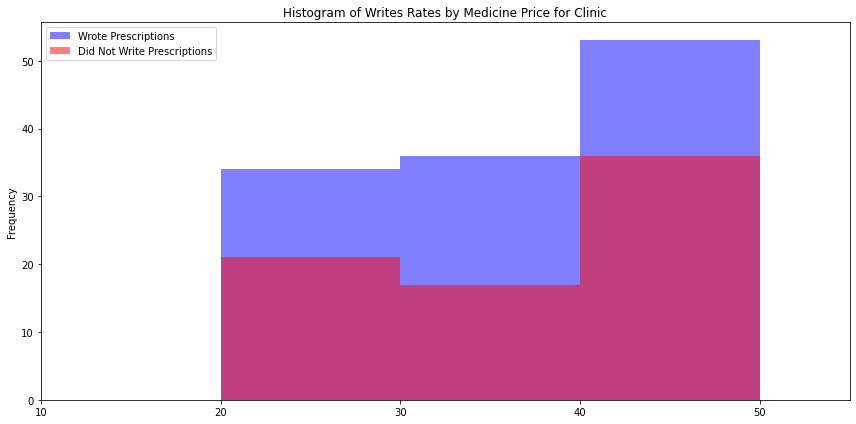

In [21]:
# Filter data for doctors of class "clinic"
doc_write = data[(data["clinic_hos"] == "hospital") & (data["write"] == 1)]  # Blue
doc_not_write = data[(data["clinic_hos"] == "hospital") & (data["write"] == 0)]  # Red

# Define the bins for the histogram
bins = np.arange(0, data['price'].max() + 10, 10)  # Adjusted bin range

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(data=doc_write, x='price', bins=bins, color="blue", alpha=0.5, label='Wrote Prescriptions')
plt.hist(data=doc_not_write, x='price', bins=bins, color="red", alpha=0.5, label='Did Not Write Prescriptions')

# Set the x-axis limits
plt.xlim(10, data['price'].max() + 10)  # Set limits to be consistent with the first chart

# Set x-ticks with custom increments
increment = 10  # Define your desired increment
x_ticks = np.arange(10, data['price'].max() + 10, increment)
plt.xticks(x_ticks)

# Set labels and title
plt.ylabel("Frequency")
plt.title("Histogram of Writes Rates by Medicine Price for Clinic")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Notes for area = area1:
 - Number of writes: 24
 - Number of didn't writes: 26
 - Write Rate: 48.00%

Notes for area = area2:
 - Number of writes: 53
 - Number of didn't writes: 27
 - Write Rate: 66.25%

Notes for area = area3:
 - Number of writes: 12
 - Number of didn't writes: 8
 - Write Rate: 60.00%

Notes for area = area4:
 - Number of writes: 13
 - Number of didn't writes: 7
 - Write Rate: 65.00%

Notes for area = area5:
 - Number of writes: 37
 - Number of didn't writes: 25
 - Write Rate: 59.68%

Notes for area = area6:
 - Number of writes: 36
 - Number of didn't writes: 21
 - Write Rate: 63.16%

Notes for area = area7:
 - Number of writes: 11
 - Number of didn't writes: 10
 - Write Rate: 52.38%

Notes for area = area8:
 - Number of writes: 43
 - Number of didn't writes: 37
 - Write Rate: 53.75%



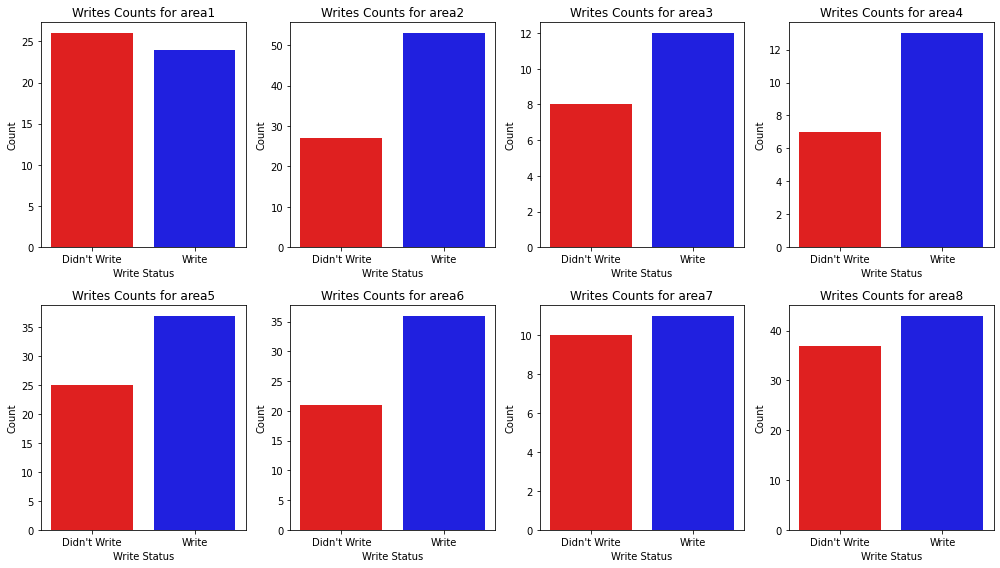

In [22]:
# Define the area values to analyze
area_values = ['area1', 'area2', 'area3', 'area4', 'area5', 'area6', 'area7', 'area8']

# Create a figure with subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(14, 8))  # Adjust the figure size for better spacing
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each area value and create a subplot
for i, area in enumerate(area_values):
    # Filter data for the specified area
    filtered_data = data[data['area'] == area]
    
    # Count writes (1 for yes, 0 for no)
    writes_counts = filtered_data['write'].value_counts()

    # Create a bar plot with switched colors (red for write, blue for didn't write)
    sb.barplot(x=writes_counts.index, y=writes_counts.values, ax=axes[i], palette=['red', 'blue'])
    
    # Set titles and labels
    axes[i].set_title(f'Writes Counts for {area}', fontsize=12)
    axes[i].set_xlabel('Write Status', fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Didn\'t Write', 'Write'])  # Set x-axis labels

    # Calculate write and not write counts
    writes_count = writes_counts.get(1, 0)  # Number of writes
    not_writes_count = writes_counts.get(0, 0)  # Number of not writes
    total_count = writes_count + not_writes_count
    write_rate = writes_count / total_count * 100 if total_count > 0 else 0
    
    # Print notes for this area
    print(f"Notes for area = {area}:")
    print(f" - Number of writes: {writes_count}")
    print(f" - Number of didn't writes: {not_writes_count}")
    print(f" - Write Rate: {write_rate:.2f}%\n")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Notes for type = type1:
 - Number of writes: 91
 - Number of not writes: 66
 - Write Rate: 57.96%

Notes for type = type2:
 - Number of writes: 28
 - Number of not writes: 24
 - Write Rate: 53.85%

Notes for type = type3:
 - Number of writes: 21
 - Number of not writes: 10
 - Write Rate: 67.74%

Notes for type = type4:
 - Number of writes: 43
 - Number of not writes: 29
 - Write Rate: 59.72%

Notes for type = type5:
 - Number of writes: 28
 - Number of not writes: 17
 - Write Rate: 62.22%

Notes for type = type6:
 - Number of writes: 18
 - Number of not writes: 15
 - Write Rate: 54.55%



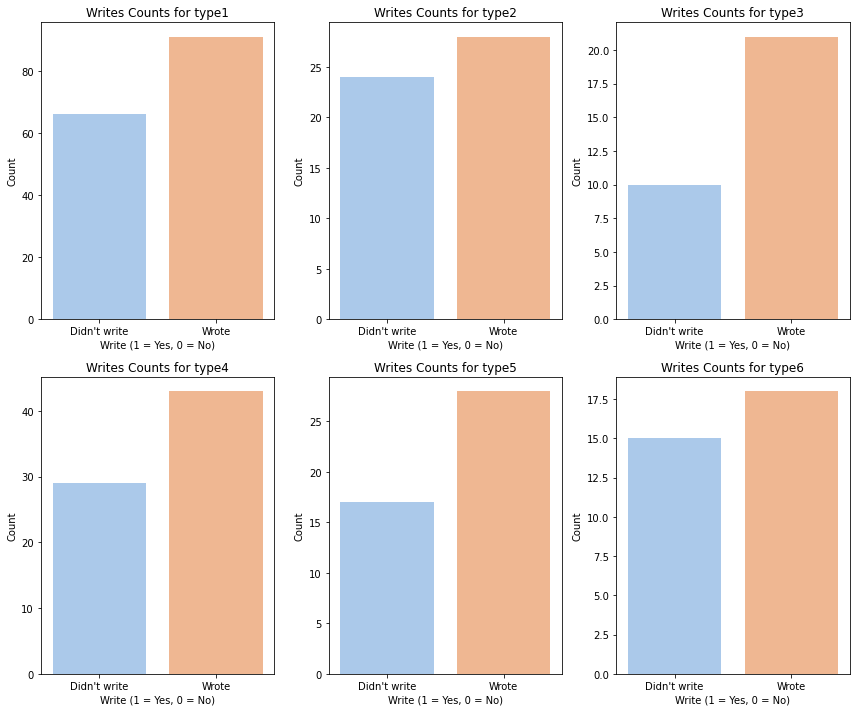

In [23]:
# Define the medicine types to analyze
med_type = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each medicine type and create a subplot
for i, med in enumerate(med_type):
    # Filter data for the specified medicine type
    filtered_data = data[data['medicine'] == med]  # Use 'med' instead of 'med_type'
    
    # Count writes and not writes
    writes_counts = filtered_data['write'].value_counts()

    # Create a bar plot
    sb.barplot(x=writes_counts.index, y=writes_counts.values, ax=axes[i], palette='pastel')
    
    # Set titles and labels
    axes[i].set_title(f'Writes Counts for {med}')
    axes[i].set_xlabel('Write (1 = Yes, 0 = No)')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Didn\'t write', 'Wrote'])
    
    # Calculate write and not write counts
    writes_count = writes_counts.get(1, 0)  # Number of writes
    not_writes_count = writes_counts.get(0, 0)  # Number of not writes
    total_count = writes_count + not_writes_count
    write_rate = writes_count / total_count * 100 if total_count > 0 else 0
    
    # Print notes for this medicine type
    print(f"Notes for type = {med}:")
    print(f" - Number of writes: {writes_count}")
    print(f" - Number of not writes: {not_writes_count}")
    print(f" - Write Rate: {write_rate:.2f}%\n")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [24]:
data.describe()

,id_dr,exam_price,write,price
count,390.000000,390.000000,390.000000,390.000000
mean,195.500000,121.205128,0.587179,35.715385
std,112.727548,86.729844,0.492974,8.751263
min,1.000000,30.000000,0.000000,20.000000
25%,98.250000,50.000000,0.000000,29.000000
50%,195.500000,80.000000,1.000000,36.000000
75%,292.750000,170.000000,1.000000,45.000000
max,390.000000,350.000000,1.000000,45.000000


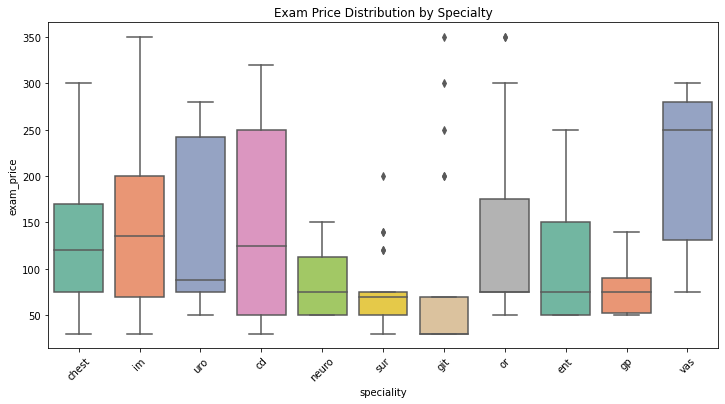

In [25]:
plt.figure(figsize=(12, 6))
sb.boxplot(x='speciality', y='exam_price', data=data, palette='Set2')
plt.xticks(rotation=45)
plt.title('Exam Price Distribution by Specialty')
plt.show()


Silhouette coefficient: 0.5465681193714097


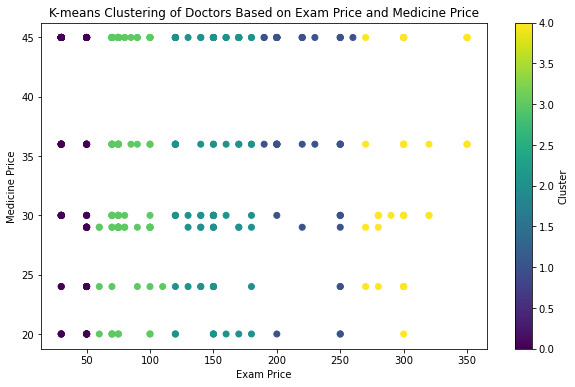

Cluster Centers:
   exam_price      price  medicine_type2  medicine_type3  medicine_type4  \
0   38.727273  36.054545        0.109091        0.081818        0.163636   
1  222.380952  37.238095        0.071429        0.047619        0.333333   
2  147.380952  34.476190        0.178571        0.107143        0.166667   
3   77.964602  36.035398        0.106195        0.044248        0.150442   
4  304.390244  34.902439        0.243902        0.146341        0.219512   

   medicine_type5  medicine_type6  area_area2  area_area3  area_area4  ...  \
0        0.072727        0.118182    0.363636    0.018182    0.054545  ...   
1        0.047619        0.071429    0.047619    0.071429    0.047619  ...   
2        0.107143        0.095238    0.035714    0.107143    0.035714  ...   
3        0.212389        0.070796    0.300885    0.035398    0.061947  ...   
4        0.048780        0.024390    0.024390    0.048780    0.048780  ...   

   speciality_git  speciality_gp  speciality_im  speciali

In [68]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Select relevant features for clustering
# We're including exam_price, speciality, clinic_hos, write, medicine, price
columns_for_clustering = ['exam_price', 'medicine', 'price','area','speciality','dr_class','clinic_hos']

# Step 2: Preprocessing
# One-hot encode categorical variables (speciality, clinic_hos, and medicine)
data_clustering = pd.get_dummies(data[columns_for_clustering], drop_first=True)

# Step 3: K-means clustering
# Initialize KMeans with 3 clusters (this number can be adjusted)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans algorithm to the data
kmeans.fit(data_clustering)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Evaluate the clustering results
silhouette_avg = silhouette_score(data_clustering, data['Cluster'])
print("Silhouette coefficient:", silhouette_avg)

# Step 4: Visualize the clusters
# Example visualization using scatter plots of exam_price and medicine price
plt.figure(figsize=(10, 6))
plt.scatter(data['exam_price'], data['price'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Exam Price')
plt.ylabel('Medicine Price')
plt.title('K-means Clustering of Doctors Based on Exam Price and Medicine Price')
plt.colorbar(label='Cluster')
plt.show()

# Optional: Analyze cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=data_clustering.columns)
print("Cluster Centers:")
print(cluster_centers)


## Using the dendrogram to find the optimal number of clusters

## Training the K-Means Clustering model on the dataset

### Normalizing Numerical Features

In data analysis and machine learning, it is crucial to normalize numerical features to ensure that each feature is treated equally during model training. Many algorithms, particularly distance-based or gradient-based methods, are sensitive to the scale of the input data. Therefore, it is important to scale numerical features so that they contribute equally to the model.

Normalization does not alter the distribution or shape of the data but ensures that the feature values are transformed to a common scale. In this case, we will apply **Min-Max Scaling**, which transforms each feature to a range between `[0, 1]`. This helps standardize features such as `exam_price` or `medicine_price`, which may have different ranges.

Once normalized, the numerical features will be ready for clustering or other machine learning techniques.

In [69]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Split the data into features and target label
income_raw = data['write']  # Assuming 'write' is the target variable
features_raw = data.drop('write', axis=1)  # Drop the target variable from features

# Identify numeric columns in the features DataFrame
numeric_col = features_raw.select_dtypes(include=['float64', 'int64']).columns  # Get numeric columns

print("Numerical columns:", numeric_col)

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()  # default=(0, 1)

# Scale only the numeric columns in features_raw
features_raw[numeric_col] = scaler.fit_transform(features_raw[numeric_col])

# Show an example of a record with scaling applied
display(features_raw.head(5))

Numerical columns: Index(['id_dr', 'exam_price', 'price'], dtype='object')


,id_dr,area,speciality,dr_class,exam_price,clinic_hos,medicine,price,Cluster
0,0.000000,area1,chest,a,0.531250,clinic,type1,1.00,1
1,0.002571,area2,im,b,0.218750,clinic,type4,0.64,3
2,0.005141,area8,chest,a,0.140625,hospital,type1,1.00,3
3,0.007712,area5,chest,a,0.000000,hospital,type1,1.00,0
4,0.010283,area6,uro,a,0.593750,clinic,type5,0.36,1


### Implementation: Data Preprocessing

In our dataset, we have several features that are non-numeric. Learning algorithms typically expect input to be numeric, which necessitates converting these non-numeric features (known as *categorical variables*). One popular method for conversion is **one-hot encoding**. This technique creates a _"dummy"_ variable for each possible category of each non-numeric feature. 

For example, consider a feature named `someFeature` with three possible entries: `A`, `B`, or `C`. This feature can be encoded into three new features: `someFeature_A`, `someFeature_B`, and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

In the code cell below, you will implement the following steps:
- Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the categorical features in the dataset.
- Convert any necessary non-numeric target labels into numerical entries.

In [70]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_raw)

# Print the number of features after one-hot encoding
#encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(features_final.shape[1]))

# Uncomment the following line to see the encoded feature names
display(features_final[0:10])

33 total features after one-hot encoding.


,id_dr,exam_price,price,Cluster,area_area1,area_area2,area_area3,area_area4,area_area5,area_area6,...,dr_class_a,dr_class_b,clinic_hos_clinic,clinic_hos_hospital,medicine_type1,medicine_type2,medicine_type3,medicine_type4,medicine_type5,medicine_type6
0,0.000000,0.531250,1.00,1,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
1,0.002571,0.218750,0.64,3,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
2,0.005141,0.140625,1.00,3,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
3,0.007712,0.000000,1.00,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,0
4,0.010283,0.593750,0.36,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
5,0.012853,0.343750,0.36,2,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
6,0.015424,0.125000,0.00,3,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
7,0.017995,0.140625,0.64,3,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
8,0.020566,0.375000,0.40,2,0,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,0
9,0.023136,0.375000,0.40,2,1,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [71]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final,income_raw, test_size = 0.2, random_state = 5)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 312 samples.
Testing set has 78 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Decision Trees
- Logistic Regression
- Support Vector Machines (SVM)
- XGBoost
- AdaBoost

### Implementation - Creating a Training and Predicting Pipeline

To evaluate the performance of the selected models, we need to create a training and predicting pipeline that efficiently trains and tests these models. This process will allow us to calculate both accuracy and F-scores on the training and testing datasets.

**Steps to implement:**

1. **Import Metrics:**  
   Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to evaluate the models.

2. **Import Selected Models:**  
   Import the models `LogisticRegression`, `SVC`, `DecisionTreeClassifier`, and other classifiers such as `AdaBoostClassifier` and `XGBClassifier`.

3. **Training the Models:**  
   Use the `fit` method to train the models on the training set, and then predict the results using the `predict` method.

4. **Evaluating the Models:**  
   For each model:
   - Calculate the accuracy score for both the training and testing sets using `accuracy_score`.
   - Calculate the F-score for both the training and testing sets using `fbeta_score`, making sure to set the `beta` parameter appropriately for evaluating performance beyond just accuracy.

In [91]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(),
    "Random Forest" : RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

# Initialize variables to store the best model information
best_model = None
best_test_accuracy = 0
best_test_fbeta = 0
best_model_name = ""

# Train and evaluate models
for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # F-beta scores
    train_fbeta = fbeta_score(y_train, y_train_pred, beta=0.2)
    test_fbeta = fbeta_score(y_test, y_test_pred, beta=0.2)
    
    # Print accuracy and fbeta scores
    print(f"Training Accuracy: {round(train_accuracy * 100)}%")
    print(f"Testing Accuracy: {round(test_accuracy * 100)}%")
    print(f"Training F-beta (beta=0.2): {round(train_fbeta * 100)}%")
    print(f"Testing F-beta (beta=0.2): {round(test_fbeta * 100)}%")
    
    # Update best model based on the combination of accuracy and F-beta score on the test set
    if test_accuracy > best_test_accuracy and test_fbeta > best_test_fbeta:
        best_test_accuracy = test_accuracy
        best_test_fbeta = test_fbeta
        best_model = model
        best_model_name = model_name
    
    # Print classification report for testing set
    print("\nClassification Report (Testing Set):")
    print(classification_report(y_test, y_test_pred))

# Print the best model based on test accuracy and F-beta score
print(f"\nBest Model: {best_model_name}")
print(f"Best Test Accuracy: {round(best_test_accuracy * 100)}%")
print(f"Best Test F-beta (beta=0.2): {round(best_test_fbeta * 100)}%")



Model: Decision Tree
Training Accuracy: 100%
Testing Accuracy: 63%
Training F-beta (beta=0.2): 100%
Testing F-beta (beta=0.2): 75%

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.49      0.64      0.55        28
           1       0.76      0.62      0.68        50

    accuracy                           0.63        78
   macro avg       0.62      0.63      0.62        78
weighted avg       0.66      0.63      0.64        78


Model: Logistic Regression
Training Accuracy: 73%
Testing Accuracy: 74%
Training F-beta (beta=0.2): 74%
Testing F-beta (beta=0.2): 81%

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        28
           1       0.81      0.78      0.80        50

    accuracy                           0.74        78
   macro avg       0.72      0.73      0.73        78
weighted avg       0.75      0.74      0.75        78


M

In [88]:
# Import necessary libraries for tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning SVC
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly'],  # Kernel type
    'degree': [2, 3, 4]  # Degree for polynomial kernel (if used)
}

# Initialize the SVC model
svc = SVC()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model with the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and accuracy score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.3f}")

# Evaluate the tuned model on the test set
best_svc = grid_search.best_estimator_
y_test_pred = best_svc.predict(X_test)

# Print test accuracy and F-beta score
test_accuracy = accuracy_score(y_test, y_test_pred)
test_fbeta = fbeta_score(y_test, y_test_pred, beta=0.2)

print(f"Test Accuracy: {round(test_accuracy * 100)}%")
print(f"Test F-beta (beta=0.2): {round(test_fbeta * 100)}%")

# Print classification report for the tuned model on the test set
print("\nClassification Report (Testing Set):")
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.740
Test Accuracy: 73%
Test F-beta (beta=0.2): 81%

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.61      0.68      0.64        28
           1       0.81      0.76      0.78        50

    accuracy                           0.73        78
   macro avg       0.71      0.72      0.71        78
weighted avg       0.74      0.73      0.73        78



In [89]:
from sklearn.ensemble import VotingClassifier

# Define individual classifiers
svc = SVC(C=10, degree=2, gamma='auto', kernel='rbf')
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()

# Combine them in a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('svc', svc), 
    ('log_reg', log_reg), 
    ('rf', random_forest)], 
    voting='hard')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate the Voting Classifier
y_test_pred = voting_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_fbeta = fbeta_score(y_test, y_test_pred, beta=0.2)

print(f"Test Accuracy: {round(test_accuracy * 100)}%")
print(f"Test F-beta (beta=0.2): {round(test_fbeta * 100)}%")

# Classification report
print("\nClassification Report (Testing Set):")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 74%
Test F-beta (beta=0.2): 81%

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        28
           1       0.81      0.78      0.80        50

    accuracy                           0.74        78
   macro avg       0.72      0.73      0.73        78
weighted avg       0.75      0.74      0.75        78



In [101]:
!pip uninstall scikit-learn imbalanced-learn
!pip install scikit-learn==0.24.2 imbalanced-learn==0.7.0


^C
^C


In [102]:
# Import necessary libraries
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Apply SMOTE to handle class imbalance
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define individual models
svc = SVC(probability=True, kernel='rbf', C=10, degree=2, gamma='auto')  # SVC model with tuned parameters
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()

# Create a Voting Classifier with soft voting and weights
voting_clf = VotingClassifier(estimators=[
    ('svc', svc), 
    ('log_reg', log_reg), 
    ('rf', random_forest)], 
    voting='soft',  # soft voting to allow probabilities
    weights=[3, 1, 2]  # Giving more weight to SVC based on its previous performance
)

# Train Voting Classifier on resampled data
voting_clf.fit(X_train_resampled, y_train_resampled)

# Predictions on the testing set
y_test_pred = voting_clf.predict(X_test)

# Accuracy and F-beta score for testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_fbeta = fbeta_score(y_test, y_test_pred, beta=0.2)

# Print results
print(f"Test Accuracy: {round(test_accuracy * 100)}%")
print(f"Test F-beta (beta=0.2): {round(test_fbeta * 100)}%")

# Classification report for the testing set
print("\nClassification Report (Testing Set):")
print(classification_report(y_test, y_test_pred))

# Optional: Perform hyperparameter tuning for the Voting Classifier
# If you want to further tune the hyperparameters of individual models within the Voting Classifier
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['rbf', 'linear'],
    'rf__n_estimators': [50, 100, 200],
    'log_reg__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(estimator=voting_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and accuracy after tuning
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.3f}")

# Test accuracy and F-beta score after tuning
y_test_pred_tuned = grid_search.best_estimator_.predict(X_test)
tuned_test_accuracy = accuracy_score(y_test, y_test_pred_tuned)
tuned_test_fbeta = fbeta_score(y_test, y_test_pred_tuned, beta=0.2)

print(f"Test Accuracy after Tuning: {round(tuned_test_accuracy * 100)}%")
print(f"Test F-beta (beta=0.2) after Tuning: {round(tuned_test_fbeta * 100)}%")

# Classification report after tuning
print("\nClassification Report (Testing Set after Tuning):")
print(classification_report(y_test, y_test_pred_tuned))


ImportError: cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (C:\Users\hoda_\anaconda3\lib\site-packages\sklearn\base.py)

In [74]:
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10, 100],   # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],   # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Perform Halving Grid Search CV with SVC
halving_search = HalvingGridSearchCV(
    SVC(),
    param_grid,
    factor=2,  # Determines how aggressively candidates are halved
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Fit the model
halving_search.fit(X_train, y_train)

# Best parameters and accuracy score
best_params = halving_search.best_params_
best_accuracy = halving_search.best_score_

best_params, best_accuracy


n_iterations: 4
n_required_iterations: 5
n_possible_iterations: 4
min_resources_: 20
max_resources_: 312
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 16
n_resources: 20
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 1
n_candidates: 8
n_resources: 40
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 2
n_candidates: 4
n_resources: 80
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 3
n_candidates: 2
n_resources: 160
Fitting 5 folds for each of 2 candidates, totalling 10 fits


({'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}, 0.7201612903225807)

In [78]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, accuracy_score
# TODO: Initialize the classifier
print("step1")
clf = AdaBoostClassifier(random_state=5)
print("step2")
# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
#parameters = {'n_estimators': [10,100,200,300,350,400,500,600,700], 'learning_rate': [0.001,0.05,0.1,0.5,1.0,1.5,2,3,4],'base_estimator':[DecisionTreeClassifier(random_state=5)],'base_estimator__max_depth':[2,4,6,8,10,12,14,15],'base_estimator__min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,12,14],'base_estimator__min_samples_split':[2,3,4,5,6,7,8,9,10,12,14,16]}
parameters = {
    'n_estimators': [200, 1000], 
    'learning_rate': [0.5, 1.5],  # Added the missing comma
    'base_estimator': [DecisionTreeClassifier(random_state=5)], 
    'base_estimator__max_depth': [2, 4, 8], 
    'base_estimator__min_samples_leaf': [7, 12], 
    'base_estimator__min_samples_split': [2, 8, 14]
}

print("step3")
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.2)
print("step4")
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters,scoring=scorer)
print("step5")
# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit =grid_obj.fit(X_train, y_train) 
print("step6")
# Get the estimator
best_clf = grid_fit.best_estimator_
print("step7")
# Make predictions using the unoptimized and model
un_optmized_model=clf.fit(X_train, y_train)
predictions = un_optmized_model.predict(X_test)
print("step8")
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.2)))

step1
step2
step3
step4
step5
step6
step7
step8
Unoptimized model
------
Accuracy score on testing data: 0.7051
F-score on testing data: 0.7853

Optimized Model
------
Final accuracy score on the testing data: 0.6410
Final F-score on the testing data: 0.7367


In [79]:
best_clf.learning_rate

1.5

In [80]:
best_clf

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=7,
                                                         random_state=5),
                   learning_rate=1.5, n_estimators=200, random_state=5)

In [81]:
clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 5}